# π for Regular polygons

The mathematical constant π is defined to be the ratio of the circumference of a circle to it's diamater.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Pi_eq_C_over_d.svg/2000px-Pi_eq_C_over_d.svg.png" style="width: 200px; float: left"/>

We can extend this idea to include polygons if we take the diamater to be the line segment that bisects the polygon and simply take the perimeter to be the circumference.

For regular polygons we can have a little fun with finding the value of π as a function of the n, the number of sides.

We'll call this function, η(x) because I like saying "eta".

Now, η(x) should have a couple of properties: first, as n tends towards infinity we should approach a value of π. (A circle is **not** an infini-gon though hence *tends*!) Second, it should only depend on `n`, the number of sides as π is a ratio and the actual diameter / preimeter will scale with one another.

So, lets get cracking!

<img src="http://www.emathematics.net/imagenes/regularpolygon.gif" />

# Some things to note...

**For even n**,<br>
The diameter will be drawn joining two vertices, cutting the regular polygon in half. This is also the largest line segment that can be drawn inside the polygon.

**For odd n**,<br>
The diameter will be drawn from a vertex to the midpoint of the opposite side, again cutting the regular polygon in half. This time however, there is a longer line segment that can be drawn if we move to either of the vertices at the end of the side being bisected.
* It would also be reasonable to adjust our definition of the diamater to be `"The greatest line segment bounded by the perimeter of the polygon"`. As `n → ∞` the side length of the polygon will tend towards 0 and the difference between these two line segments will also tend towards 0.

<img src="http://etc.usf.edu/clipart/43400/43447/6c2_43447_md.gif" style="width: 200px; float: left; margin: 0px 10px"/>

A regular polygon can always be drawn with its vertices placed on the circumference of a circle.

Joining the centre of the circle to each vertex partitions the polygon into n congruent isosceles triangles with side lengths of `r` (the radius) and `l` (the side length of the polygon).

The size of each angle at the centre is `2π / n` radians as we are dividing the circle into `n` equal segments.

<img src="http://image.slidesharecdn.com/vid-150331003105-conversion-gate01/95/cosine-rule-10-638.jpg" style="width: 500px; float: left"/>

Then, using the cosine rule, we can find the side length `l`:<br>
`c² = a² + b² - 2.a.b.Cos(A)`<br>
`l² = 2r² - 2r²Cos(2π / n)`<br>
`l = √(2r²(1 - Cos(2π / n)))`<br>

To obtain the perimeter of the circle we simply multiply the side length by `n`, the number of sides.

If we define the Diameter `D = 1`, then our function `η(n)` simply becomes the calculation of the perimeter of a regular n-gon with radius `r = 0.5`.

In [2]:
function η(n::Int)
    sidelength = sqrt(0.5 * (1 - cos(((2 * π) / n))))
    return n * sidelength
end

# And just for completeness and funsies, let's define a function that
# returns the radius given the sidelength and number of sides
function polygonRadius(n::Int, sidelength::Float64)
    return sqrt((sidelength^2 / (2 * (1 - cos(2π/n)))))
end

polygonRadius (generic function with 1 method)

## Lets see how this looks as n increases!
So, to recap: we are defining the Diameter of a Polygon to be the line segment that starts at a vertex and bisects the polygon. `(An alternative definition would be that the Diameter is the greatest line segment that can be drawn within the perimeter of the polygon)`

As such, we have obtained a formula η(n) that gives the ratio of the circumference to the diameter for a regular n-gon.

The following plots use the [Gadfly](http://dcjones.github.io/Gadfly.jl/) package.<br>
[Winston](https://github.com/nolta/Winston.jl) is an alternative if you want quick, simple plots.

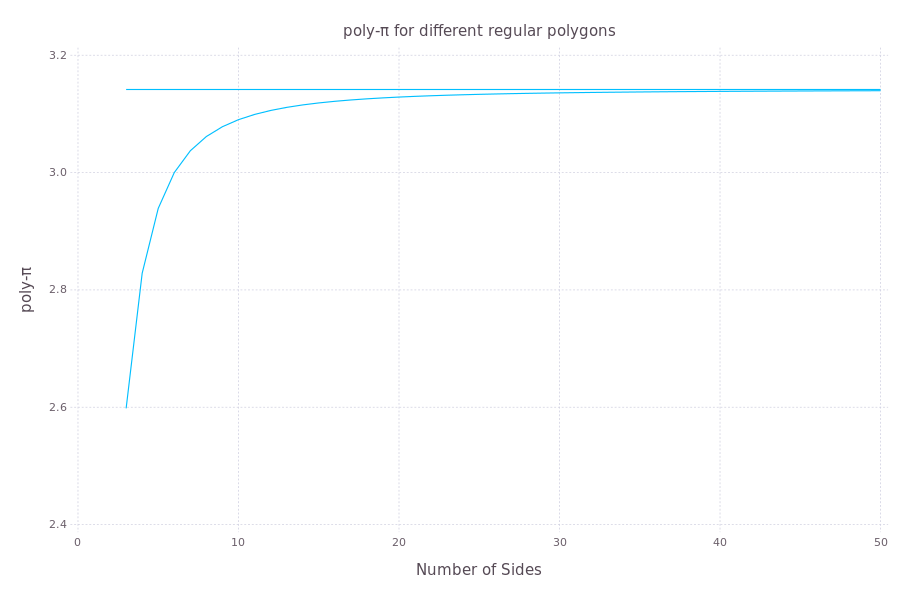

In [21]:
using Gadfly
set_default_plot_size(24cm, 16cm)

n = 3:50
pi = [π for x in 3:50]
polygonpi = [η(x) for x in 3:50]

plot(
layer(x = n, y = polygonpi, Geom.line),
layer(x = n, y = pi, Geom.line),
Guide.XLabel("Number of Sides"),
Guide.YLabel("poly-π"),
Guide.Title("poly-π for different regular polygons"))

### Not bad! Let's go bigger...

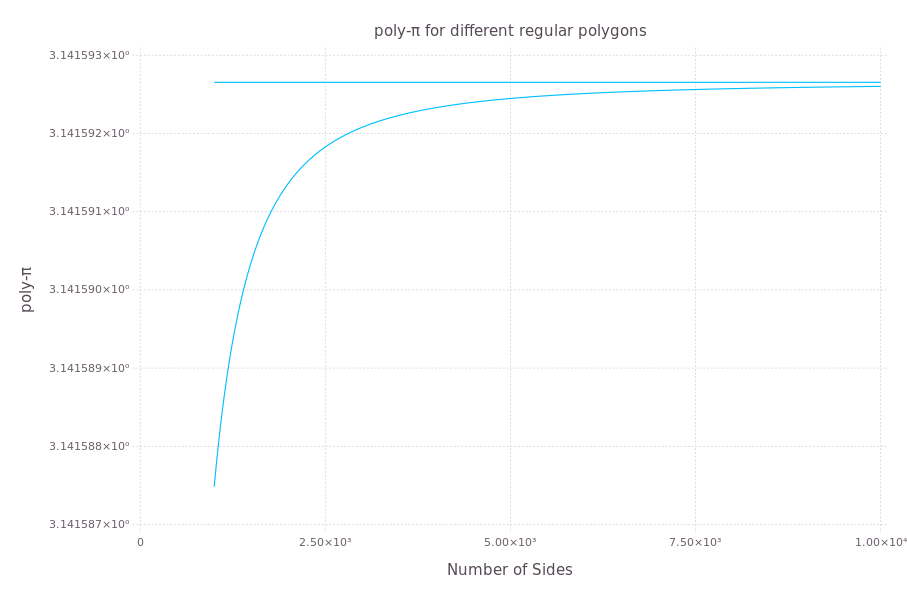

In [22]:
n = 1000:10:10000
pi = [π for x in 1000:10:10000]
polygonpi = [η(x) for x in 1000:10:10000]

plot(
layer(x = n, y = polygonpi, Geom.line),
layer(x = n, y = pi, Geom.line),
Guide.XLabel("Number of Sides"),
Guide.YLabel("poly-π"),
Guide.Title("poly-π for different regular polygons"))

### Let's have a look at how far off we are as a function of n:

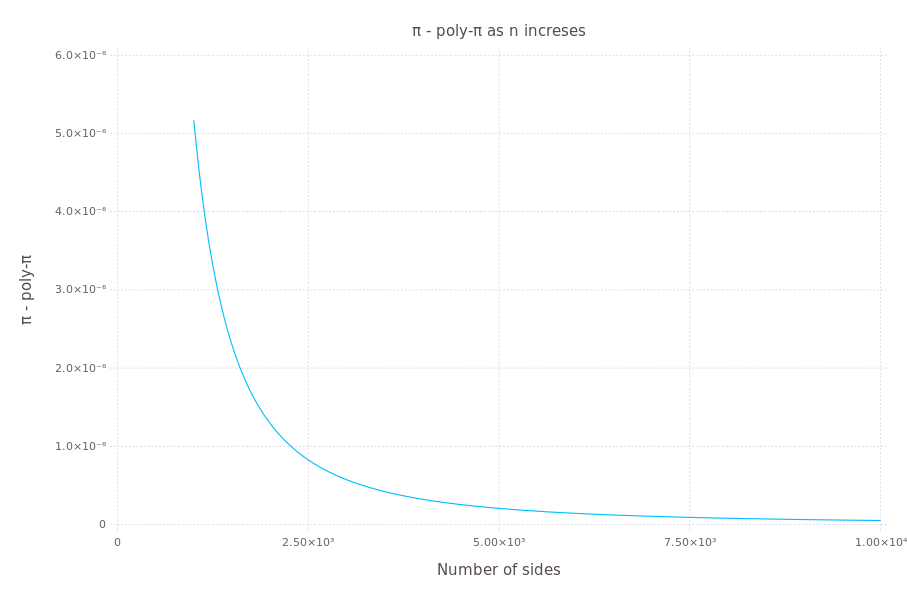

In [23]:
n = 1000:10:10000
pidelta = [π - η(x) for x in 1000:10:10000]

plot(
layer(x = n, y = pidelta, Geom.line),
Guide.XLabel("Number of sides"),
Guide.YLabel("π - poly-π"),
Guide.Title("π - poly-π as n increses"))

### Not bad either! Something odd starts to happen if we get bigger though...

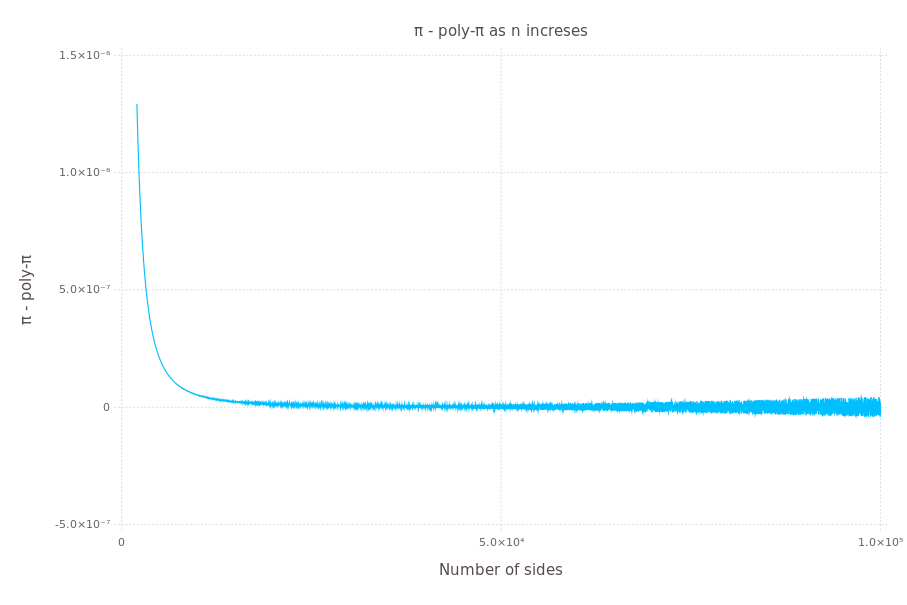

In [24]:
n = 2000:10:100000
pidelta = [π - η(x) for x in 2000:10:100000]

plot(
layer(x = n, y = pidelta, Geom.line),
Guide.XLabel("Number of sides"),
Guide.YLabel("π - poly-π"),
Guide.Title("π - poly-π as n increses"))

### Hello floating point numbers!...You suck...

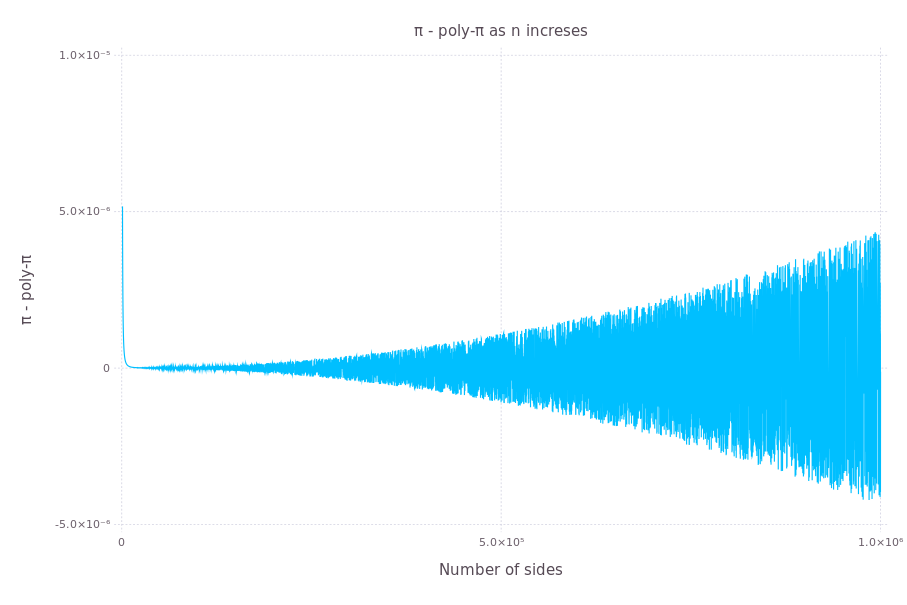

In [25]:
n = 1000:100:1000000
pidelta = [π - η(x) for x in 1000:100:1000000]

plot(
layer(x = n, y = pidelta, Geom.line),
Guide.XLabel("Number of sides"),
Guide.YLabel("π - poly-π"),
Guide.Title("π - poly-π as n increses"))

### Let's swap to BigFloats instead: arbitrary precision floating point numbers

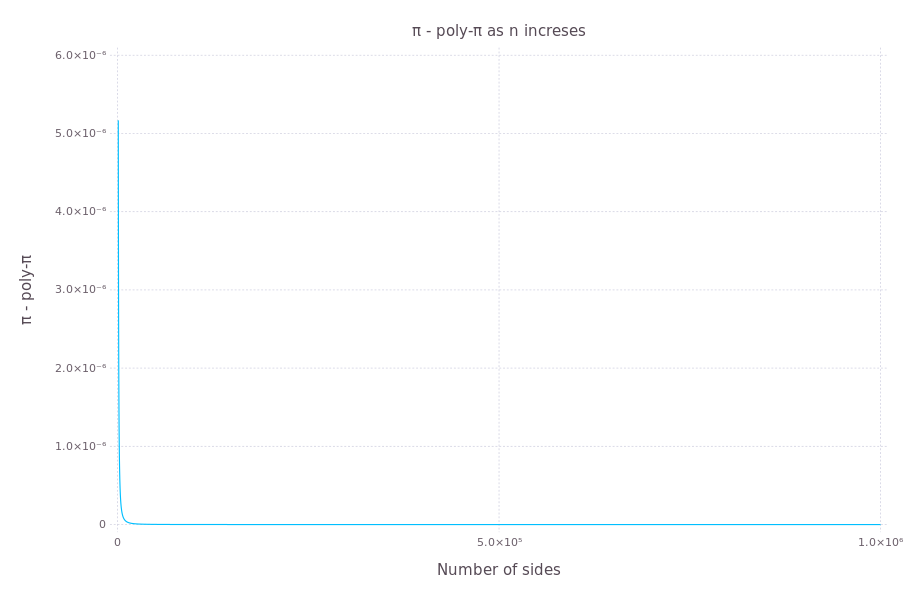

In [26]:
function bfη(n::Int)
    sidelength = sqrt(0.5 * (1 - cos(BigFloat(((2 * π) / n)))))
    return n * sidelength
end

n = 1000:100:1000000
pidelta = [π - bfη(x) for x in 1000:100:1000000]

plot(
layer(x = n, y = pidelta, Geom.line),
Guide.XLabel("Number of sides"),
Guide.YLabel("π - poly-π"),
Guide.Title("π - poly-π as n increses"))

### Much better!